In [ ]:
!pip install pandas numpy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip list | grep pandas
!pip list | grep numpy
!pip list | grep seaborn

pandas                        1.3.5
pandas-datareader             0.9.0
pandas-gbq                    0.13.3
pandas-profiling              1.4.1
sklearn-pandas                1.8.0
numpy                         1.21.6
seaborn                       0.11.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

# Visualisation d’un nuage de points et exploration des variables

1.   Importez les librairies qu’il nous faut (pandas, seaborn, matplotlib, numpy)

In [ ]:
path = "/content/drive/MyDrive/Hitema/Datasets/house_pricing.csv"
house_pricing = pd.read_csv(path)

In [ ]:
house_pricing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


2.   Donnez la liste des variables présentes dans ce dataset ainsi que leur nature (sont elles qualitatives, quantitatives, discrète etc…) et leur type (float, int, str etc…)

In [ ]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

3.   En créant un nuage de points, regardez comment se comporte la colonne LotArea par
rapport au SalePrice

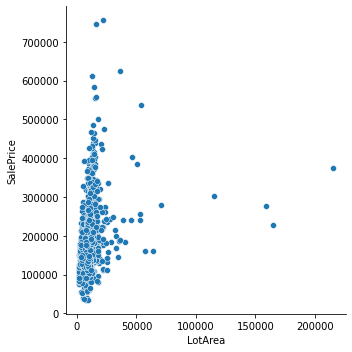

In [ ]:
#house_pricing.plot(x='LotArea', y='SalePrice', kind='scatter')
sb.relplot(data=house_pricing, x="LotArea", y="SalePrice")

4.   Affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotArea inférieur à 20 000 pieds carrés et un prix inférieur à 500 000$

In [ ]:
#deux méthodes pour sélectionner une colonne d'un dataframe
house_pricing['LotArea'] #préférable
#house_pricing.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [ ]:
#méthode masque: house_pricing['LotArea'] < 20000
tmp = house_pricing[house_pricing['LotArea'] < 20000] #sort un dataframe filtré selon la condition: colonne du dataframe correspondant à la condition

In [ ]:
tmp2 = tmp[tmp['SalePrice'] < 500000]; tmp2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


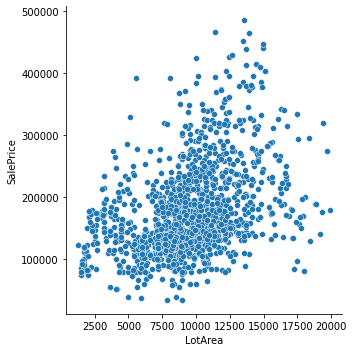

In [ ]:
#house_pricing.query('LotArea < 20000 & SalePrice < 500000').plot(x='LotArea', y='SalePrice', kind='scatter')
sb.relplot(data=tmp2, x="LotArea", y="SalePrice")

5.   En créant un nuage de points, regardez la relation entre le LotFrontage et le LotArea

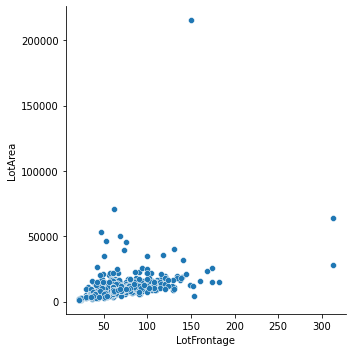

In [ ]:
#house_pricing.plot(x='LotFrontage', y='LotArea', kind='scatter')
sb.relplot(data=house_pricing, x="LotFrontage", y="LotArea")

6.   De la même manière, affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotFrontage inférieur à 200 pieds carrés et un LotArea inférieur à 100000 pieds carré

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


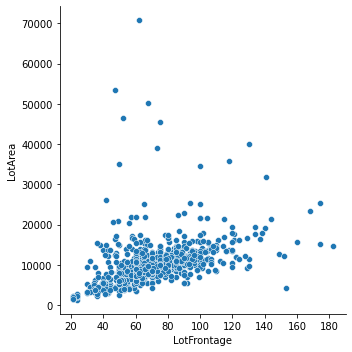

In [ ]:
#house_pricing.query('LotArea < 100000 & LotFrontage < 200').plot(x='LotFrontage', y='LotArea', kind='scatter')
values = house_pricing[house_pricing['LotArea'] < 100000][house_pricing['LotFrontage'] < 200]
sb.relplot(data=values, x="LotFrontage", y="LotArea")

# Visualisation de relations continues

1.   Importez les librairies qu’il vous faut

In [ ]:
path = "/content/drive/MyDrive/Hitema/Datasets/sales_predictions.csv"
sales_predictions = pd.read_csv(path)

In [ ]:
sales_predictions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [ ]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


2.   En utilisant relplot(), construisez un graphique qui va vous permettre de voir l’évolution des prix par rapport au temps. Que pouvez vous voir ?

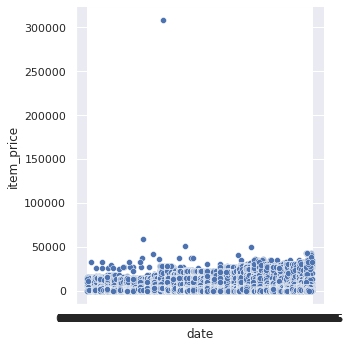

In [ ]:
#sales_predictions.plot(x='date', y='item_price')
sb.relplot(data=sales_predictions, x="date", y="item_price")

3.   Corrigeons le problème de visualisation, en utilisant la fonction .sample() de Pandas, prenez un échantillons de 50 éléments dans votre dataset


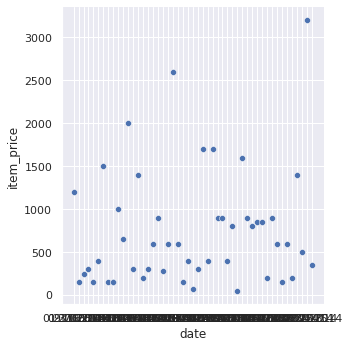

In [ ]:
values = sales_predictions.sample(50)
sb.relplot(data=values, x="date", y="item_price")

4.   Retentez de faire votre visualisation, créez une figure de taille (20,6). Que voyez vous ?

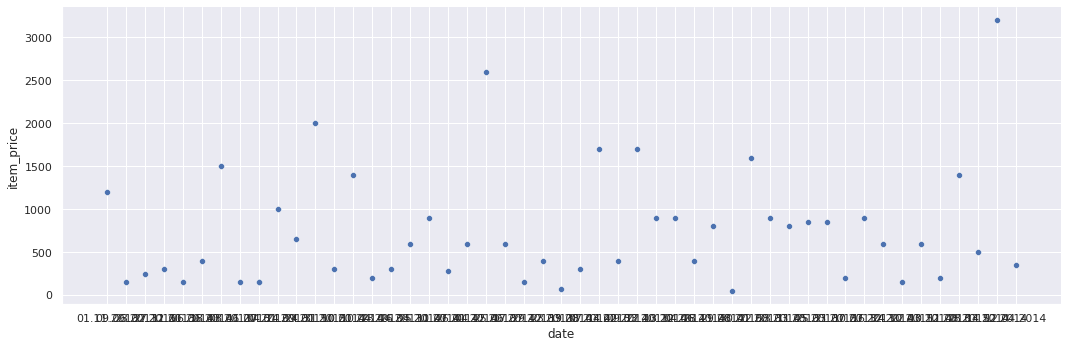

In [ ]:
#sales_predictions.sample(50).plot(x='date', y='item_price', figsize=(20, 6))
sb.relplot(data=values, x="date", y="item_price", aspect=3)

5.   En utilisant la fonction pd.to_datetime(), convertissez votre colonne date en datetime

In [ ]:
values['date']

1101864    01.11.2013
556027     09.06.2013
2459815    23.02.2015
1176014    27.12.2013
1305779    11.01.2014
1724781    06.06.2014
264791     18.03.2013
608885     08.06.2013
656764     11.07.2013
46980      04.01.2013
2852364    24.09.2015
2407118    24.01.2015
2044884    31.10.2014
1340811    10.01.2014
372017     10.04.2013
421877     23.04.2013
1586703    26.04.2014
2045419    25.10.2014
1790083    11.07.2014
1310937    26.01.2014
1130168    04.12.2013
1710724    25.06.2014
649246     17.07.2013
1222767    29.12.2013
679553     11.07.2013
1467183    23.03.2014
1902144    19.08.2014
298111     07.03.2013
1442064    14.02.2014
308536     09.03.2013
2105016    22.10.2014
2271680    13.12.2014
1727765    04.06.2014
2180638    28.11.2014
2781160    29.08.2015
93092      30.01.2013
1870667    22.08.2014
308647     23.03.2013
488156     11.05.2013
2534826    25.03.2015
651757     21.07.2013
658411     10.07.2013
2198219    16.12.2014
2926263    24.10.2015
1469302    22.03.2014
1220917   

In [ ]:
datetime = pd.to_datetime(values['date'], infer_datetime_format=True)
datetime

1101864   2013-01-11
556027    2013-09-06
2459815   2015-02-23
1176014   2013-12-27
1305779   2014-11-01
1724781   2014-06-06
264791    2013-03-18
608885    2013-08-06
656764    2013-11-07
46980     2013-04-01
2852364   2015-09-24
2407118   2015-01-24
2044884   2014-10-31
1340811   2014-10-01
372017    2013-10-04
421877    2013-04-23
1586703   2014-04-26
2045419   2014-10-25
1790083   2014-11-07
1310937   2014-01-26
1130168   2013-04-12
1710724   2014-06-25
649246    2013-07-17
1222767   2013-12-29
679553    2013-11-07
1467183   2014-03-23
1902144   2014-08-19
298111    2013-07-03
1442064   2014-02-14
308536    2013-09-03
2105016   2014-10-22
2271680   2014-12-13
1727765   2014-04-06
2180638   2014-11-28
2781160   2015-08-29
93092     2013-01-30
1870667   2014-08-22
308647    2013-03-23
488156    2013-11-05
2534826   2015-03-25
651757    2013-07-21
658411    2013-10-07
2198219   2014-12-16
2926263   2015-10-24
1469302   2014-03-22
1220917   2013-10-12
2795353   2015-11-08
1496026   201

6.   Retentez une dernière fois votre visualisation

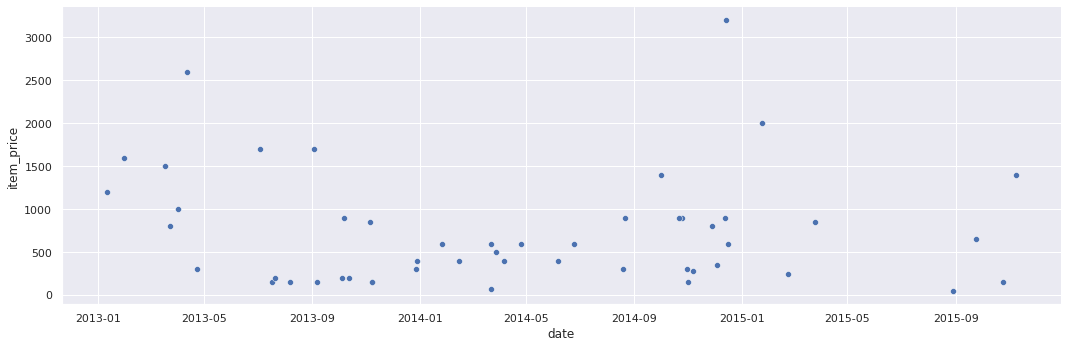

In [ ]:
#sales_predictions.sample(50).plot(x='date', y='item_price', figsize=(20, 6))
sb.relplot(data=values, x=datetime, y="item_price", aspect=3)

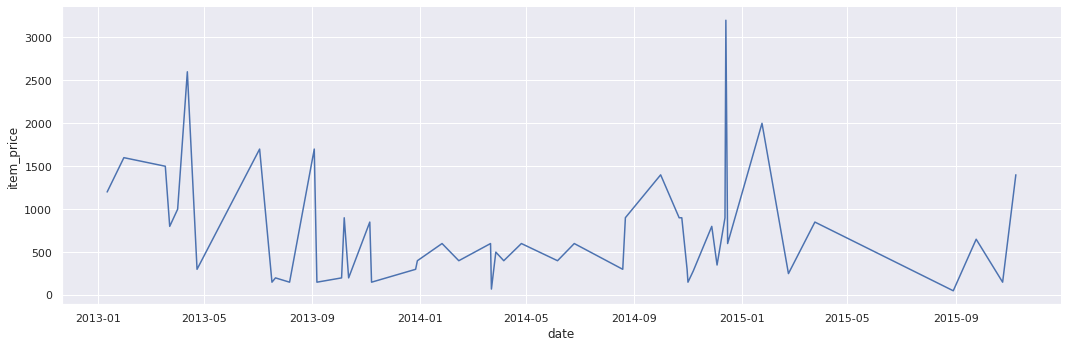

In [ ]:
sb.relplot(data=values, x=datetime, y="item_price", kind="line", aspect=3)

# Visualisation de variables catégoriques

1.   Importez les librairies qu’il vous faut

In [ ]:
path = "/content/drive/MyDrive/Hitema/Datasets/IBM_HR_ATTRITION.csv"
ibm_hr = pd.read_csv(path)

In [ ]:
ibm_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
ibm_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

2.   En utilisant catplot(), construisez un graphique qui vous permette de voir la distribution des personnes qui ont quitté l’entreprise par rapport à leur JobSatisfaction

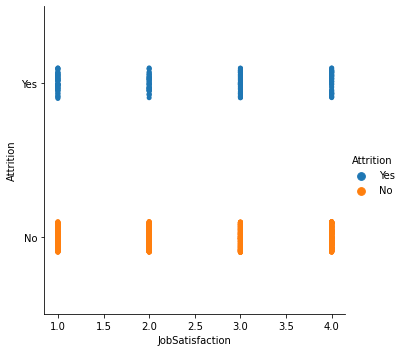

In [ ]:
#values = ibm_hr[ibm_hr['Attrition'] == 'Yes']
sb.catplot(data=ibm_hr, x="JobSatisfaction", y="Attrition", hue="Attrition")

3.   Changez de graphique et utilisez plutôt un boxplot, que pouvez vous conclure ?

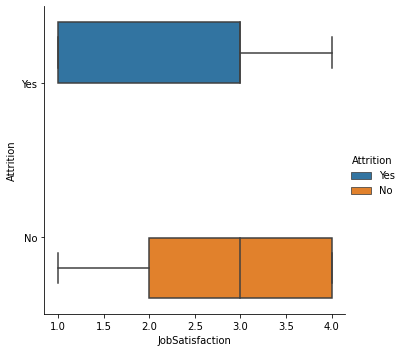

In [ ]:
sb.catplot(data=ibm_hr, x="JobSatisfaction", y="Attrition", hue="Attrition", kind="box")
#sb.boxplot(data=ibm_hr, x="JobSatisfaction", y="Attrition", hue="Attrition")

4.   Peut-on dire grâce aux boxplot si une variable présente des valeurs aberrantes ?

Non

5.   Isolez les observations présentant des valeurs aberrantes pour la variable JobSatisfaction en fonction de la variable indiquant si ils ont quitté l’entreprise ou non

6.   Utilisez la méthode .describe de pandas pour obtenir un tableau récapitulatif des statistiques descriptives du dataset

In [ ]:
ibm_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
ibm_hr.JobSatisfaction.describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

7.   Comparez les individus présentant des valeurs aberrantes pour la variable JobSatisfaction avec les statistiques descriptives du dataset, remarquez vous des
différences notoires ?

8.   Faites de même avec le TotalWorkingYears. Que pouvez vous conclure ?

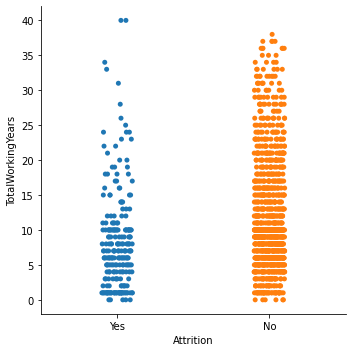

In [ ]:
sb.catplot(data=ibm_hr, x="TotalWorkingYears", y="Attrition", hue="Attrition")

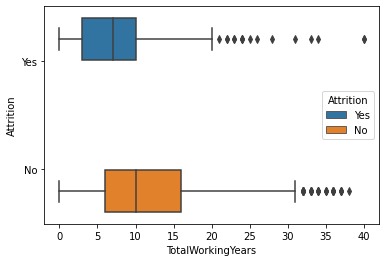

In [ ]:
sb.boxplot(data=ibm_hr, x="TotalWorkingYears", y="Attrition", hue="Attrition")

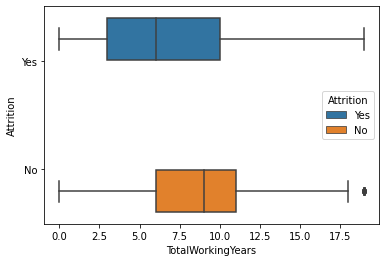

In [ ]:
values = ibm_hr[ibm_hr['TotalWorkingYears'] < 20]
sb.boxplot(data=values, x="TotalWorkingYears", y="Attrition", hue="Attrition")

9.   Remplacer les valeurs de la colonne Attrition par 1 pour Yes et 0 pour No

In [ ]:
ibm_hr_modified = ibm_hr
ibm_hr_modified['Attrition'] = ibm_hr_modified['Attrition'].replace(['Yes','No'],[1,0])

In [ ]:
ibm_hr_modified

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


10.   En utilisant un Histogramme, regardez la répartition du taux de départ par
EducationField

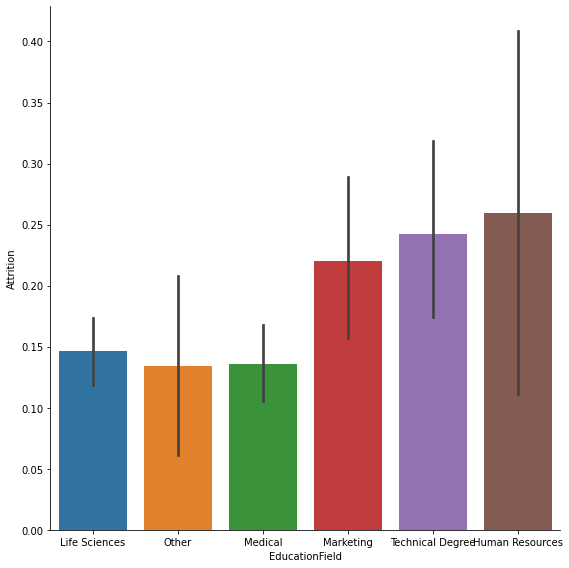

In [ ]:
sb.catplot(data=ibm_hr_modified, x="EducationField", y="Attrition", kind="bar", height=8)
#sb.histplot(data=ibm_hr_modified, y="EducationField", hue="Attrition")

# Visualisation d’une distribution

1.   Importez les librairies qu’il vous faut

In [ ]:
path = "/content/drive/MyDrive/Hitema/Datasets/IBM_HR_ATTRITION.csv"
ibm_hr = pd.read_csv(path)

In [ ]:
ibm_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
ibm_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

2.   En utilisant distplot(), construisez un graphique qui permette de voir la distribution des revenus par mois chez IBM (MonthlyIncome)

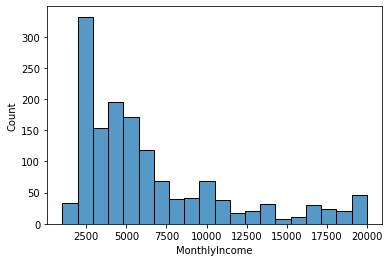

In [ ]:
sb.histplot(data=ibm_hr, x='MonthlyIncome')

2.   On peut voir que les très haut salaires biaisent notre distribution, essayons de voir la distribution des salaires entre 0 et 5000$ / mois

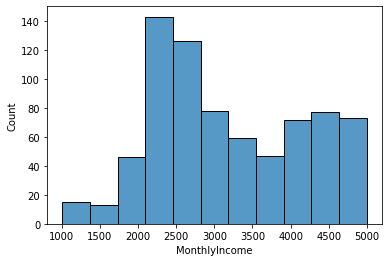

In [ ]:
values = ibm_hr[ibm_hr['MonthlyIncome'] < 5000]
sb.histplot(data=values, x='MonthlyIncome')

# Visualisation d’une relation linéaire

1.   Importez les librairies qu’il vous faut

In [ ]:
path = "/content/drive/MyDrive/Hitema/Datasets/IBM_HR_ATTRITION.csv"
ibm_hr = pd.read_csv(path)

In [ ]:
ibm_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
ibm_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

2.   On voudrait connaître la probabilité de partir de la l’entreprise par rapport à la distance par rapport à la maison. Utilisez lmplot() pour visualiser cela. Que
pouvez vous conclure ?

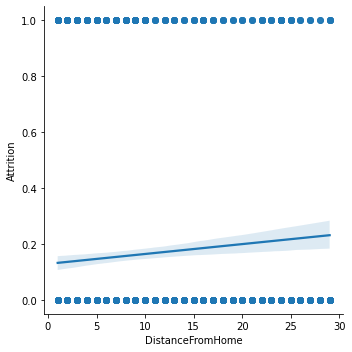

In [ ]:
sb.lmplot(data=ibm_hr_modified, x="DistanceFromHome", y="Attrition")

3.   Tentez le cette fois avec le nombre d’années passées avec le Manager (YearsWithCurrManager), que pouvez vous conclure ?

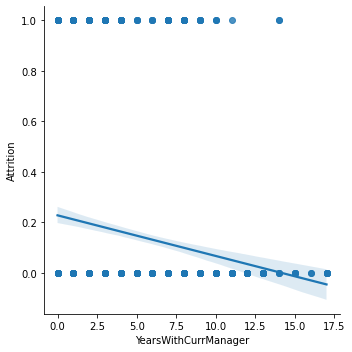

In [ ]:
sb.lmplot(data=ibm_hr_modified, x="YearsWithCurrManager", y="Attrition")

# Visualisation d’une heatmap

1.   Importez les librairies habituelles

In [ ]:
path = "/content/drive/MyDrive/Hitema/Datasets/house_pricing.csv"
house_pricing = pd.read_csv(path)

In [ ]:
house_pricing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

2.   Découpez votre dataset pour ne garder que les 15 dernieres colonnes

In [ ]:
#house_pricing_cut = house_pricing.iloc[:, 66:81]
house_pricing_cut = house_pricing.iloc[:, -15:]
house_pricing_cut

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
house_pricing_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WoodDeckSF     1460 non-null   int64 
 1   OpenPorchSF    1460 non-null   int64 
 2   EnclosedPorch  1460 non-null   int64 
 3   3SsnPorch      1460 non-null   int64 
 4   ScreenPorch    1460 non-null   int64 
 5   PoolArea       1460 non-null   int64 
 6   PoolQC         7 non-null      object
 7   Fence          281 non-null    object
 8   MiscFeature    54 non-null     object
 9   MiscVal        1460 non-null   int64 
 10  MoSold         1460 non-null   int64 
 11  YrSold         1460 non-null   int64 
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  SalePrice      1460 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 171.2+ KB


3.   Créez une matrice de corrélation avec toutes les variables du Dataset

In [ ]:
matrice_house_pricing = house_pricing_cut.corr()
matrice_house_pricing

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


4.   Créez une heatmap avec les différentes valeur de corrélation

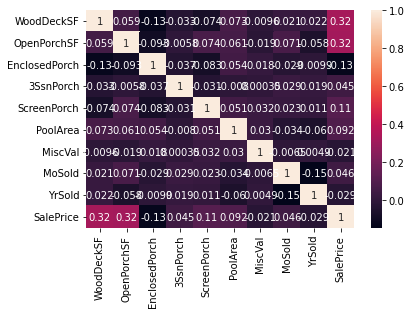

In [ ]:
sb.heatmap(data=matrice_house_pricing, annot=True)

5.   Quel est le top 3 des features qu’on devrait garder pour prédire notre prix ?

*   WoodDeckSF
*   OpenPorchSF

# Formaliser des KPI

1.   Se renseigner sur ce qu’est un KPI

Key Performance Indicators ou Indicateur Clé de Performance en français. C'est un indicateur qui aide à évaluer la productivité ou l'efficacité d'un résultat. Il aide à la prise de décision, la gestion de tableau de bord et/ ou l'atteinte d'un objectif.

2.   Importez les bonnes librairies et le dataset resto.csv

In [59]:
path = "/content/drive/MyDrive/Hitema/Datasets/resto.csv"
resto = pd.read_csv(path)

In [60]:
resto

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [61]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  3376 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


3.   Regardez les 10 premières lignes du dataset

In [62]:
resto.head(10)

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,6,3,1,Side of Chips,NaN,$1.69
7,7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


4.   Quelle est la taille de notre dataset ?

4622 lignes et 6 colonnes

In [63]:
resto

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


5.   Affichez toutes les colonnes de notre dataset

In [64]:
resto.columns.tolist()

['Unnamed: 0',
 'order_id',
 'quantity',
 'item_name',
 'choice_description',
 'item_price']

6.   Quel est l’item le plus commandé

In [65]:
resto.nlargest(1, 'quantity')

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
3598,3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25


In [88]:
resto_item_max = resto.loc[:, ['quantity', 'item_name']]
resto_item_max = resto_item_max.groupby(by='item_name').sum()
resto_item_max.nlargest(1, 'quantity')

,quantity
item_name,
Chicken Bowl,761


7.   Combien d’items ont été commandés au total chez Chipotle

In [66]:
resto.quantity.sum()

4972

8.   Combien de chiffre d’affaire à realisé Chipotle ?

In [67]:
#resto_ca = resto.loc[:, ['quantity', 'item_price']]
resto_ca = resto
#resto_ca['item_price'] = resto_ca['item_price'].replace(['$'],[''])
resto_ca['item_price'] = resto_ca['item_price'].str.slice_replace(stop=1, repl='')
resto_ca['item_price'] = resto_ca['item_price'].astype(float)
#resto_ca['item_price'] = pd.to_numeric(resto_ca['item_price'], downcast='float')
resto_ca.info()
resto_ca

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  3376 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,1,Izze,[Clementine],3.39
2,2,1,1,Nantucket Nectar,[Apple],3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [68]:
resto_ca['total_sale_item'] = resto_ca.quantity * resto_ca.item_price
resto_ca.total_sale_item.sum()

39237.02

9.   Quel est le revenu moyen par commande ?

In [82]:
resto_cmd = resto_ca.loc[:, ['order_id','quantity', 'item_price']]
resto_cmd = resto_cmd.groupby(by='order_id').sum()
resto_cmd.item_price.mean()

18.811428571428568